<a href="https://colab.research.google.com/github/annbgrge/Data-Analytics-for-Disaster-Management-Response/blob/main/Indian_Tweets_DistilBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
from csv import writer
from csv import reader

In [ ]:
#Irrelevant tweets

default_text = '0'
# Open the input_file in read mode and output_file in write mode
with open('drive/MyDrive/Indian_Floods/B_targetResultFile_irrelevant.csv', 'r') as read_obj, \
        open('drive/MyDrive/Indian_Floods/B_targetResultFile_irrelevant0.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [ ]:
#Need Tweets

default_text = '1'
# Open the input_file in read mode and output_file in write mode
with open('drive/MyDrive/Indian_Floods/B_targetResultFile_need.csv', 'r') as read_obj, \
        open('drive/MyDrive/Indian_Floods/B_targetResultFile_need1.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [ ]:
#Availablity Tweets

default_text = '2'
# Open the input_file in read mode and output_file in write mode
with open('drive/MyDrive/Indian_Floods/B_targetResultFile_availability.csv', 'r') as read_obj, \
        open('drive/MyDrive/Indian_Floods/B_targetResultFile_availability2.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [ ]:
import pandas as pd
df0 = pd.read_csv('drive/MyDrive/Indian_Floods/B_targetResultFile_irrelevant0.csv')
df1 = pd.read_csv('drive/MyDrive/Indian_Floods/B_targetResultFile_need1.csv')
df2 = pd.read_csv('drive/MyDrive/Indian_Floods/B_targetResultFile_availability2.csv')


In [ ]:
df0.columns = ['Tweet','TweetClass']
df1.columns = ['Tweet','TweetClass']
df2.columns = ['Tweet','TweetClass']

In [ ]:
df0['TweetClass'] = df0['TweetClass'].fillna(0)
df0['TweetClass'] = df0['TweetClass'].astype(int)
df1['TweetClass'] = df1['TweetClass'].astype(int)
df2['TweetClass'] = df2['TweetClass'].astype(int)

#**Data Analysing**
---

In [ ]:
df0.head()

,Tweet,TweetClass
0,Sir ji ab aap apni baat hi change kr rhe ho ab...,0
1,Baba is on a national tour in pursuit of what ...,0
2,reiji day!! ✨️ i'm so excited for his birthday...,0
3,Maharashtra political crisis: Shinde calls mee...,0
4,The Most happiest person right now is Babar As...,0


In [ ]:
df1.head()

,Tweet,TweetClass
0,"Assam flood situation sees improvement, 2.2 mn...",1
1,"Forget about 6 languages, hilly terrain, flood...",1
2,There have been floods at my place in assam in...,1
3,Urgently require blood donor at Lower Assam Ho...,1
4,"We see floods happening in Kerala, Assam & Bih...",1


In [ ]:
df2.head()

,Tweet,TweetClass
0,SRK contributed 1Cr to families who were the m...,2
1,Actor Mohanlal donated Rs. 50 lakh to househol...,2
2,Assam Govt will send money through DBT to more...,2
3,“We will disburse an amount of Rs 119.10 crore...,2
4,Aamir Khan give 25 lakh rupees\nto flood victi...,2


In [ ]:
df0.shape

(3999, 2)

In [ ]:
df1.shape

(1020, 2)

In [ ]:
df2.shape

(1020, 2)

In [ ]:
frames = [df0, df1, df2]
df = pd.concat(frames)

In [ ]:
df.head()

,Tweet,TweetClass
0,Sir ji ab aap apni baat hi change kr rhe ho ab...,0
1,Baba is on a national tour in pursuit of what ...,0
2,reiji day!! ✨️ i'm so excited for his birthday...,0
3,Maharashtra political crisis: Shinde calls mee...,0
4,The Most happiest person right now is Babar As...,0


In [ ]:
df.shape

(6039, 2)

In [ ]:
df['TweetClass'].value_counts()

0    3999
1    1020
2    1020
Name: TweetClass, dtype: int64

#**Data Cleaning**
---

In [ ]:
df.duplicated().sum()

223

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['TweetClass'].value_counts()

0    3821
1    1000
2     995
Name: TweetClass, dtype: int64

<Axes: ylabel='TweetClass'>

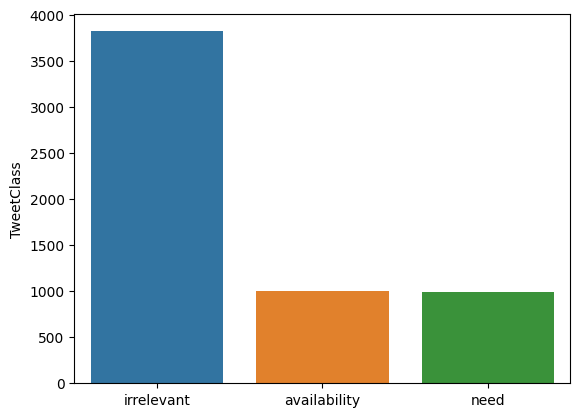

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = ["irrelevant", 'availability','need'], y = df['TweetClass'].value_counts(), data=df)

In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # removing the emojies
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dt = df1['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

                 Word  Frequency
0               assam        544
1               flood        288
2        keralafloods        258
3               water        205
4              floods        203
5              kerala        151
6            affected        113
7         electricity        106
8           situation        105
9              relief        104
10                due         99
11               food         96
12            silchar         95
13           students         89
14                amp         83
15              india         76
16               days         66
17              state         65
18               time         60
19           pmoindia         59
20               neet         59
21      chennaifloods         55
22               lakh         52
23           flooding         51
24               exam         51
25            support         48
26           drinking         47
27  keralafloodrelief         47
28               give         46
29        

In [ ]:
dt = df2['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

                 Word  Frequency
0              relief        335
1               flood        308
2               assam        265
3        keralafloods        250
4                  rs        204
5              kerala        184
6       chennaifloods        172
7              floods        171
8               crore        146
9            affected        110
10               fund        107
11            donated        106
12                 rt        100
13            victims         94
14                amp         90
15               lakh         83
16                 cm         73
17  keralafloodrelief         70
18             donate         66
19              state         65
20            gujarat         57
21              water         56
22      chennairainsh         56
23                aid         54
24               food         53
25                  5         52
26                 cr         52
27             crores         50
28         government         50
29        

In [ ]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

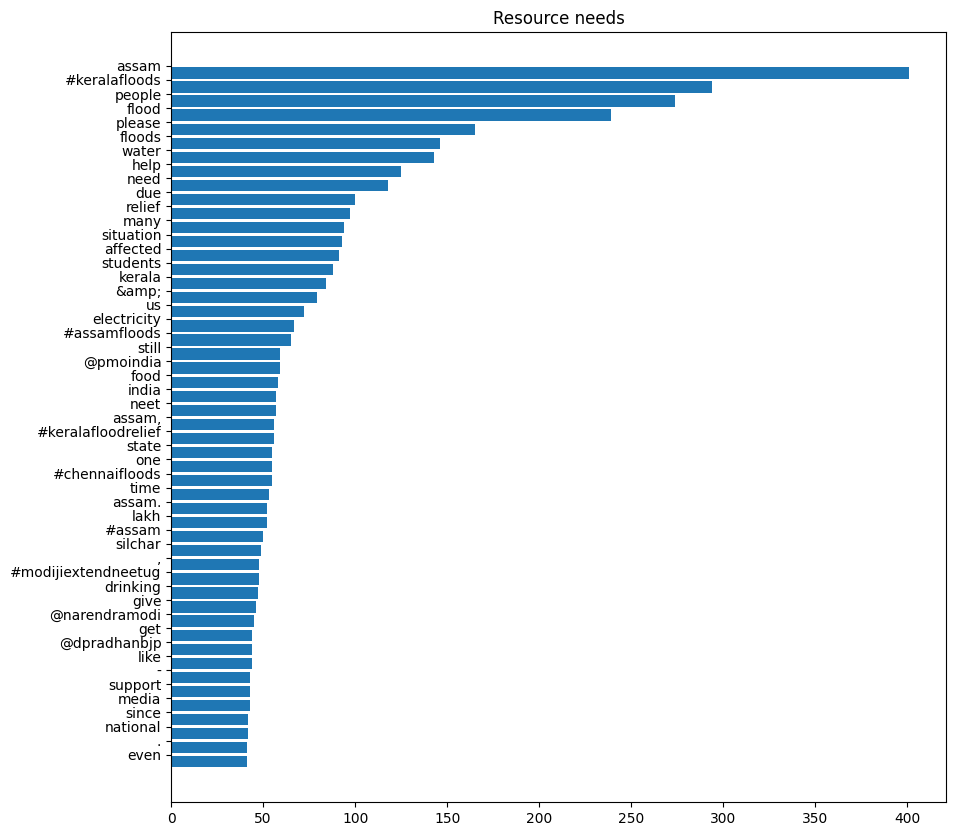

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df1,'Tweet',"Resource needs")

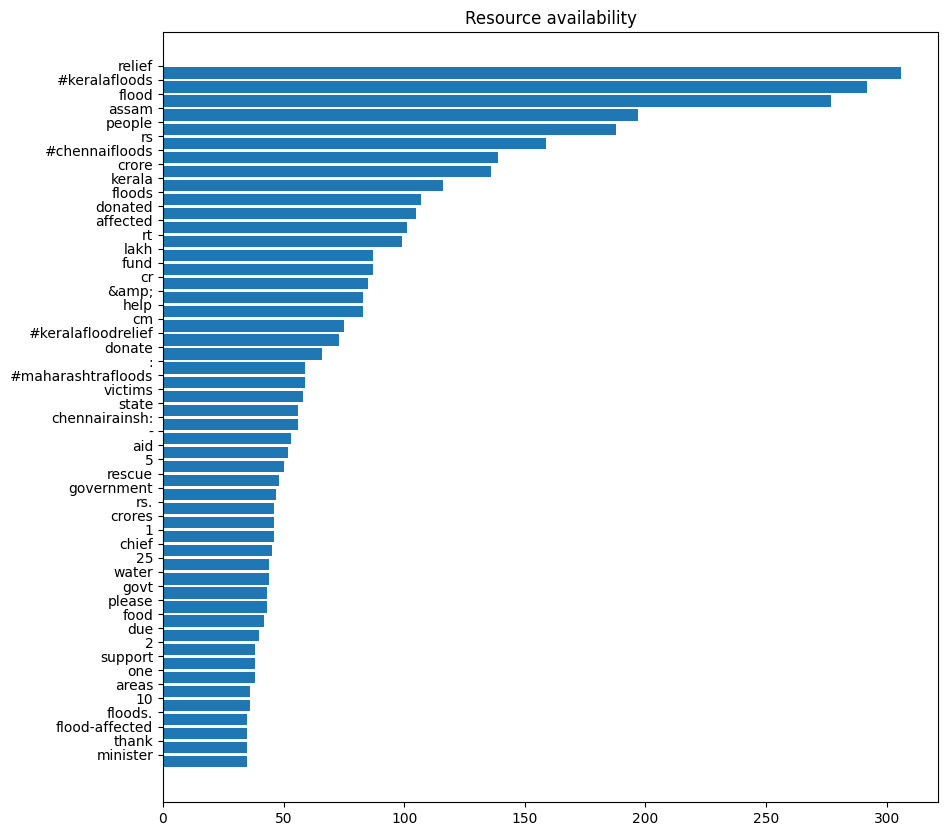

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df2,'Tweet',"Resource availability")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

need_vect = CountVectorizer(stop_words='english')

available_vect = CountVectorizer(stop_words='english')

need_dtm = need_vect.fit_transform(df1['Tweet'].apply(cleaning))
available_dtm = available_vect.fit_transform(df2['Tweet'].apply(cleaning))

In [ ]:
need_word = need_vect.get_feature_names_out()
need_freqs = need_dtm.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

5431


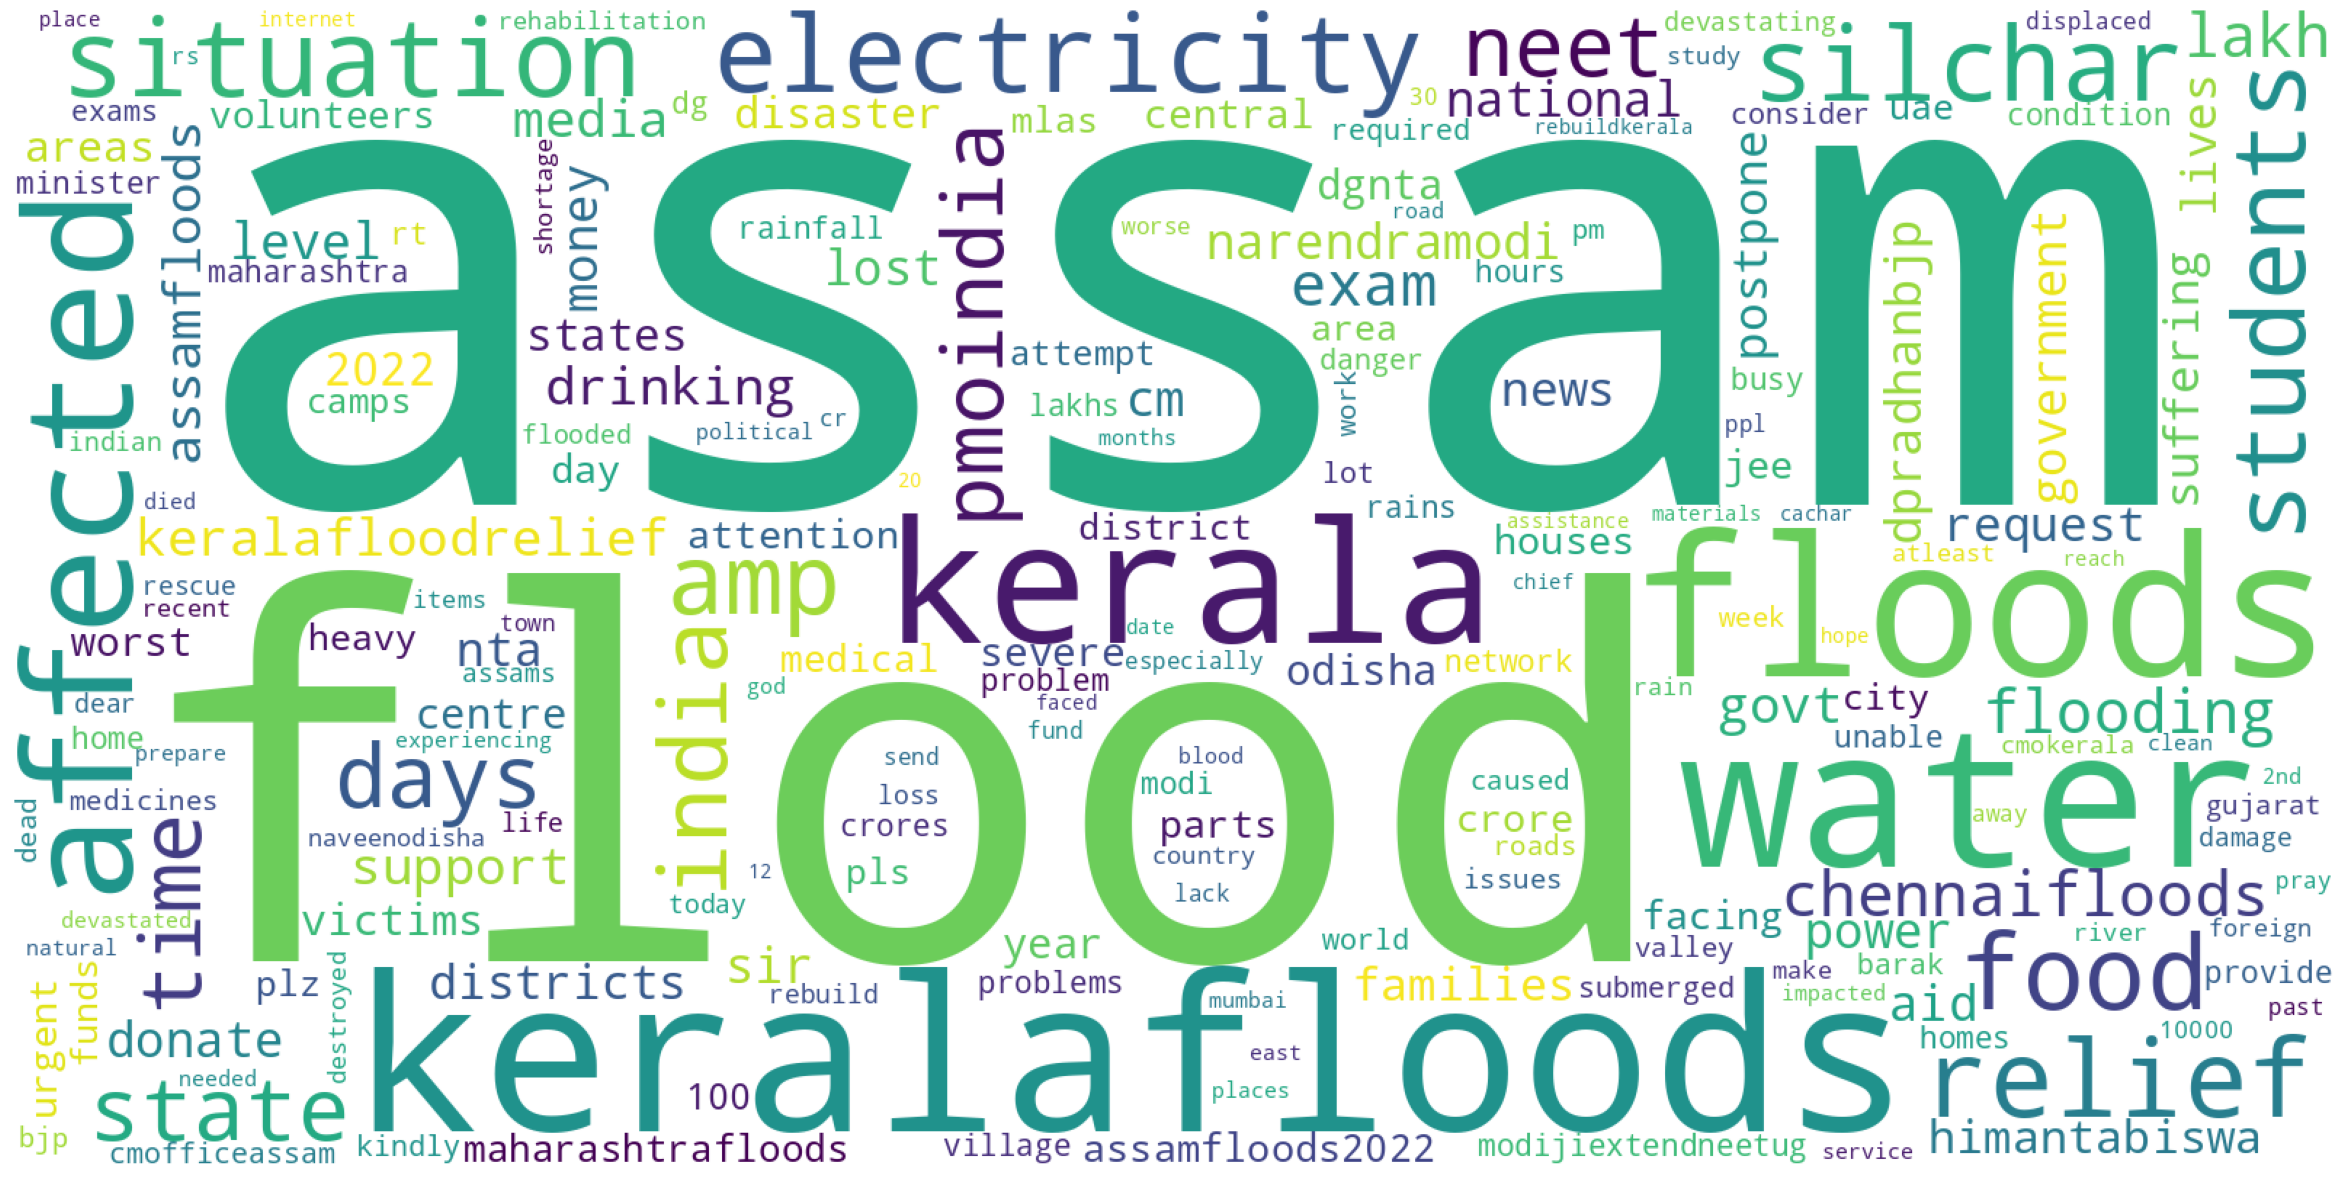

In [ ]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='white',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("need_word_cloud.png")
plt.show()

In [ ]:
available_word = available_vect.get_feature_names_out()
available_freqs = available_dtm.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

4926


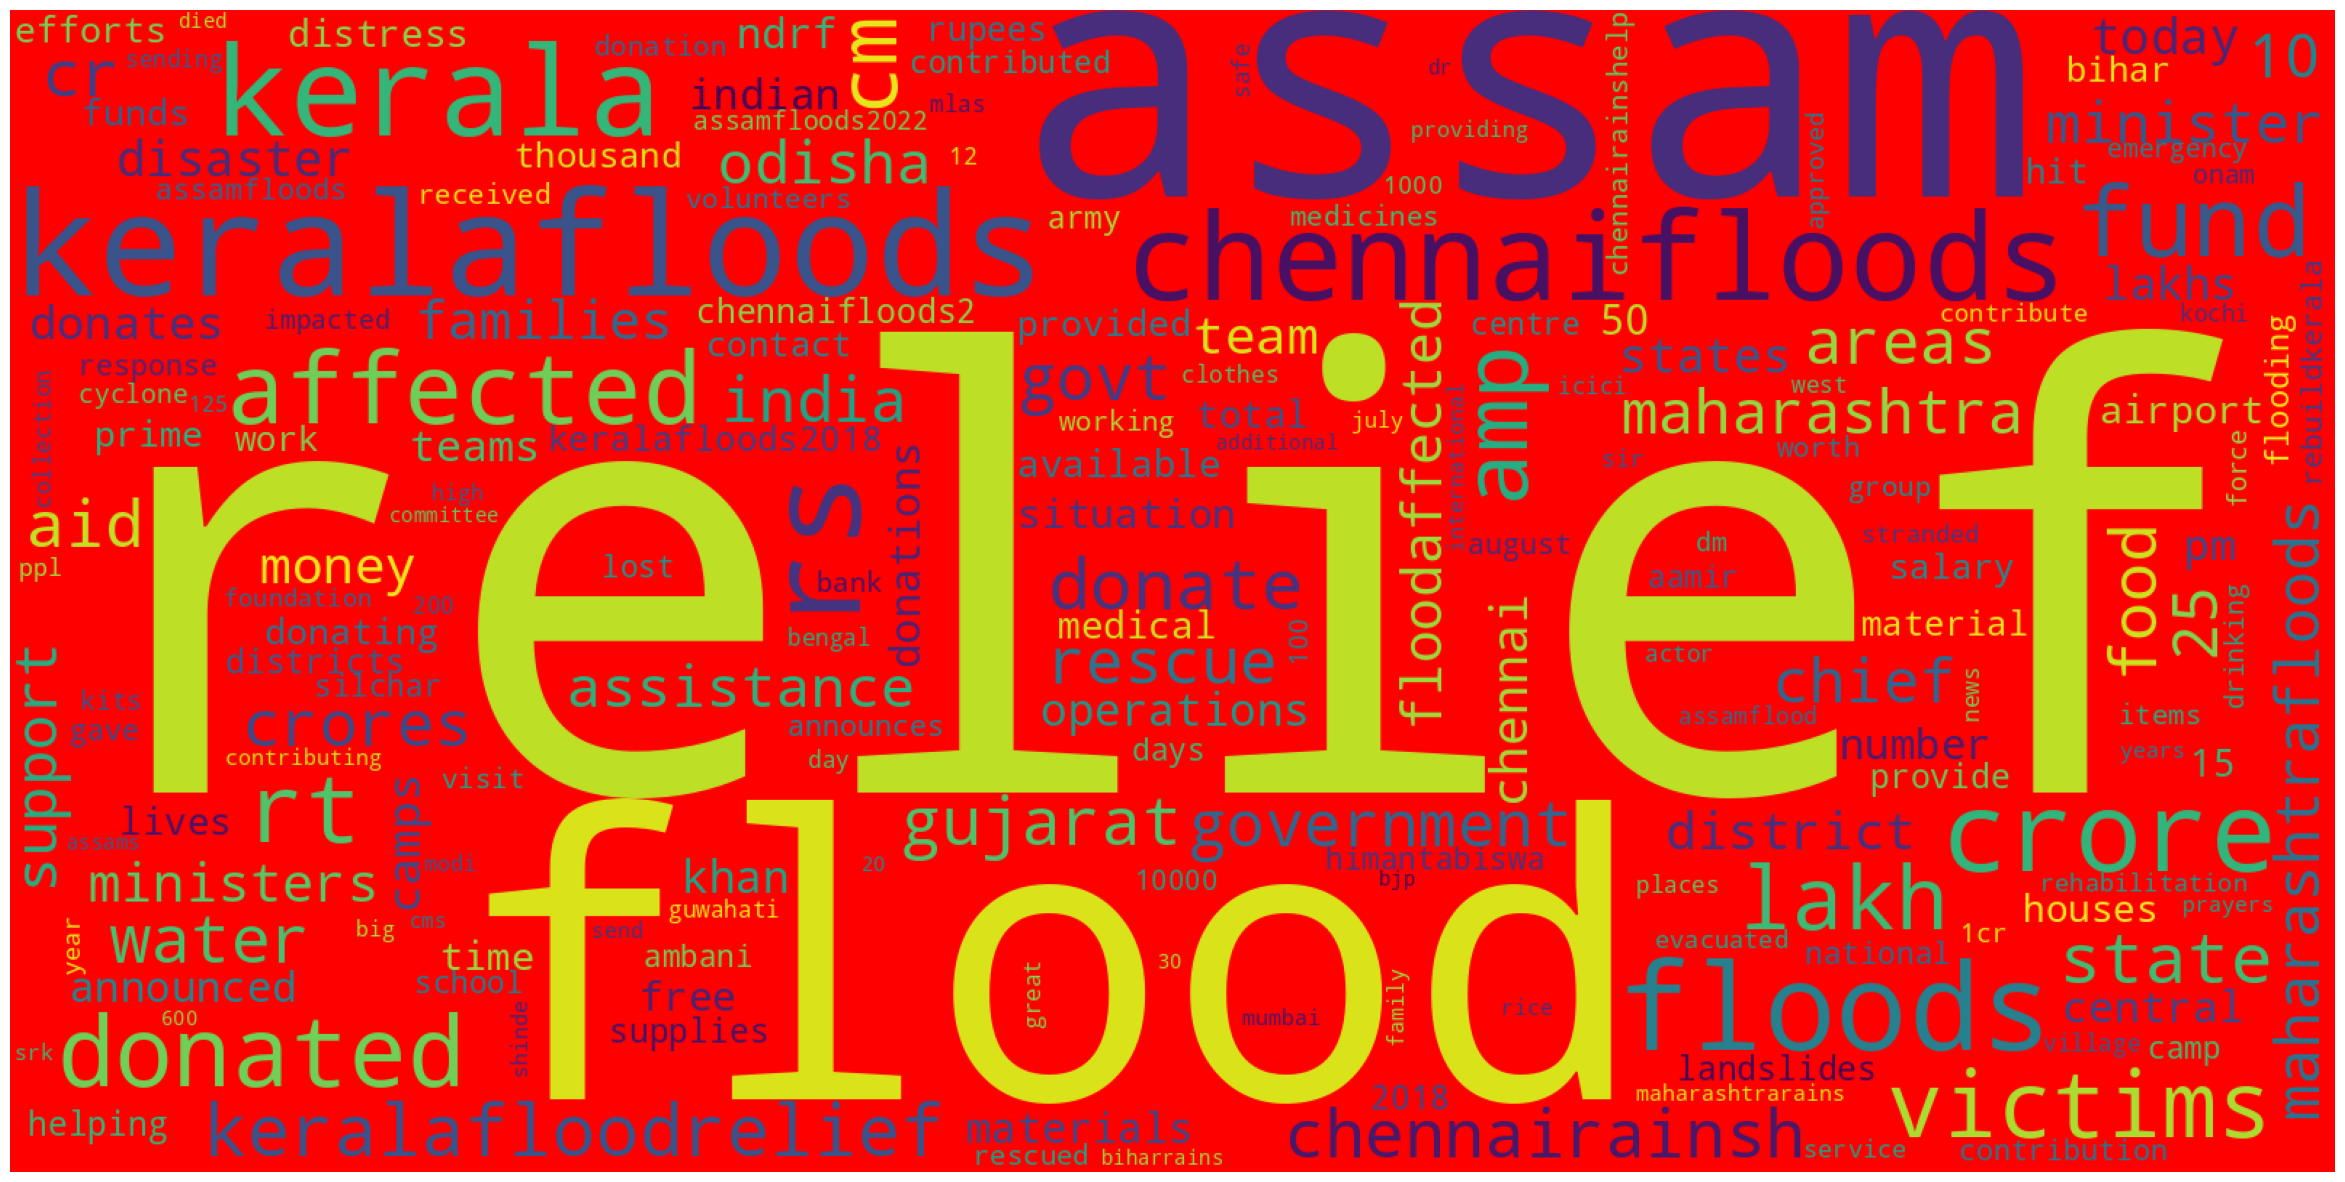

In [ ]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='red',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("available_word_cloud.png")
plt.show()

#**DistilBERT CLASSIFICATION**
---

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.2 MB/s eta 0:00:00


In [ ]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import json
import gc

In [ ]:
df['encoded_cat'] = df['TweetClass'].astype('category').cat.codes
df.head()

,Tweet,TweetClass,encoded_cat
0,Sir ji ab aap apni baat hi change kr rhe ho ab...,0,0
1,Baba is on a national tour in pursuit of what ...,0,0
2,reiji day!! ✨️ i'm so excited for his birthday...,0,0
3,Maharashtra political crisis: Shinde calls mee...,0,0
4,The Most happiest person right now is Babar As...,0,0


In [ ]:
data_texts = df["Tweet"].to_list() # Features (not-tokenized yet)
data_labels = df["encoded_cat"].to_list() # Lables

In [ ]:
from sklearn.model_selection import train_test_split

# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.2, random_state=0)

# Keep some data for inference (testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.01, random_state=0)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model.fit(train_dataset.shuffle(1000).batch(16), epochs=10, batch_size=16,
          validation_data=val_dataset.shuffle(1000).batch(16))

Epoch 1/10
288/288 [==============================] - 179s 516ms/step - loss: 0.3429 - accuracy: 0.8660 - val_loss: 0.2306 - val_accuracy: 0.9124
Epoch 2/10
288/288 [==============================] - 146s 505ms/step - loss: 0.1443 - accuracy: 0.9503 - val_loss: 0.1959 - val_accuracy: 0.9175
Epoch 3/10
288/288 [==============================] - 145s 505ms/step - loss: 0.0833 - accuracy: 0.9748 - val_loss: 0.2222 - val_accuracy: 0.9270
Epoch 4/10
288/288 [==============================] - 145s 502ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.2235 - val_accuracy: 0.9313
Epoch 5/10
288/288 [==============================] - 144s 501ms/step - loss: 0.0435 - accuracy: 0.9881 - val_loss: 0.2506 - val_accuracy: 0.9296
Epoch 6/10
288/288 [==============================] - 145s 502ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.3189 - val_accuracy: 0.9270
Epoch 7/10
288/288 [==============================] - 145s 502ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 0.3418 -

#**Example using few random tweets**
---

In [ ]:
save_directory = "drive/MyDrive/Indian_Floods/distilBERT_Models"

In [ ]:
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)


('drive/MyDrive/Indian_Floods/distilBERT_Models/tokenizer_config.json',
 'drive/MyDrive/Indian_Floods/distilBERT_Models/special_tokens_map.json',
 'drive/MyDrive/Indian_Floods/distilBERT_Models/vocab.txt',
 'drive/MyDrive/Indian_Floods/distilBERT_Models/added_tokens.json')

In [ ]:
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at drive/MyDrive/Indian_Floods/distilBERT_Models.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
print(test_texts)

['🚨 Naba Kumar Doley, the president of Assam Football Association, and Sarbananda Sonowal, the minister for Ports, Shipping, &amp; Waterways, are expected to submit a candidacy for the position of AIFF president\n\n@News9Tweets\n #IndianFootball', 'A strawberry is white kick drum, unless it is a Tippy Orthodox FBOP Assam one.', '#Bansakantha: more than 2 lakh food packets sent for flood victims from Kheda, Anand, Ahmedabad, Patan \n#GujaratFloods #Gujarat', 'にじ甲つけたら逆転がおきて社長まけてもた', 'As the flood water recedes after unprecedented rain in Assam, the fear of Japanese Encephalitis is looming large in the state. \n\nSince the outbreak of the disease, 52 people have died so far, according to the National Health Mission in Assam.\n\n#AssamFloods', '#KeralaFloods It is 20,000 bucks to clean up houses! Fleecing in the times of devastation! How sad!', 'Ah bu ben kendimi nerelerde ASSAM', 'More than 1.5 lakhs people are waiting to be recued and they need help in silchar assam. They need more rescu

In [ ]:
x = len(test_texts)
print(x)

47


In [ ]:
test_text1 = test_texts[7] #Need tweet
test_text1

'More than 1.5 lakhs people are waiting to be recued and they need help in silchar assam. They need more rescue teams and more relief teams. NO FOOD, NO DRINKING WATER, NO ELECTRICITY, NO NETWORK.. \n\n#AssamFloods\n#assamneedshelp\n#narendramodiji\n@PMOIndia\n@narendramodi\n@aajtak'

In [ ]:
test_text2 = test_texts[2] #Availability tweet
test_text2

'#Bansakantha: more than 2 lakh food packets sent for flood victims from Kheda, Anand, Ahmedabad, Patan \n#GujaratFloods #Gujarat'

In [ ]:
test_text3 = test_texts[1] #Irrelevant tweet
test_text3

'A strawberry is white kick drum, unless it is a Tippy Orthodox FBOP Assam one.'

In [ ]:
predict_input = loaded_tokenizer.encode(test_text1,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = loaded_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]
prediction_value #Need tweet prediction

1

In [ ]:
predict_input = loaded_tokenizer.encode(test_text2,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = loaded_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]
prediction_value #Availability tweet prediction

2

In [ ]:
predict_input = loaded_tokenizer.encode(test_text3,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = loaded_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]
prediction_value #Irrelevant tweet prediction

0